In [476]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data=pd.read_csv(r"D:\machine_learning\data\big_mart_sale.csv")
data.shape

(8523, 12)

In [477]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Imputing Missing values

In [478]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Missing values of Outlet size

In [479]:
mode=data["Outlet_Size"].mode()
mode

0    Medium
dtype: object

In [480]:
data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0],inplace=True)

In [481]:
data["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### Missing values of Item Weight Content

In [482]:
mean=data["Item_Weight"].mean()
mean

12.857645184136183

In [483]:
data["Item_Weight"].fillna(mean,inplace=True)

In [484]:
data["Item_Weight"].isnull().sum()

0

### Dealing with categorical varables

In [485]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [486]:
categorical_variable=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size",
                     "Outlet_Location_Type","Outlet_Type"]

for i in categorical_variable:
    print("Value Counts in :",i)
    print(data[i].value_counts())
    print("\n")

Value Counts in : Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts in : Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts in : Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value Counts in : Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Si

In [487]:
data["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"},inplace=True)

In [488]:
data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Dealing with item identifier

In [489]:
def item_identifier(item):
        return str(item[0:2])


In [490]:
data["Item_Identifier"]=data["Item_Identifier"].apply(lambda x:item_identifier(x))
data["Item_Identifier"].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

### Univariate analysis

In [491]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

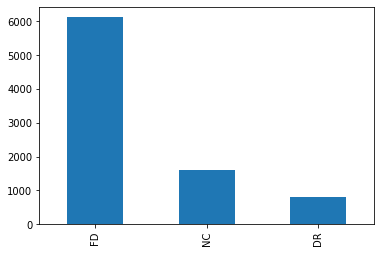

In [492]:
data["Item_Identifier"].value_counts().plot(kind="bar")

Maximum selling items are ediable

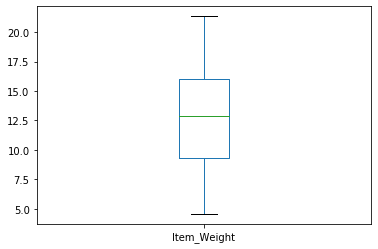

In [493]:
data["Item_Weight"].plot(kind="box")

There is no outliers in Item weight <br>
Most(50%) of the selling item has weight in between 8-16 unit.

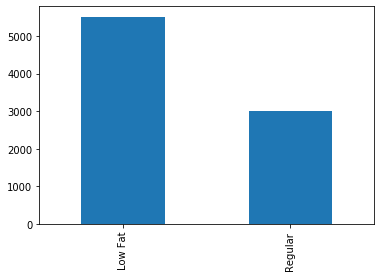

In [494]:
data["Item_Fat_Content"].value_counts().plot(kind="bar")

Most of the selling Item has low fat content

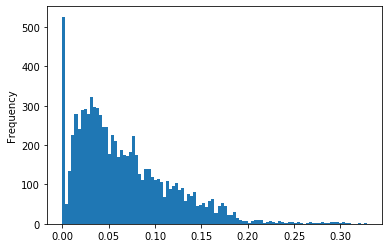

In [495]:
data["Item_Visibility"].plot(kind="hist",bins=100)

Large number of outliers has value greater tha 0.2`

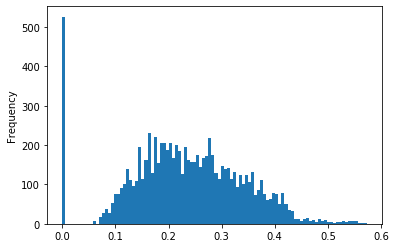

In [496]:
np.sqrt(data["Item_Visibility"]).plot(kind="hist",bins=100)

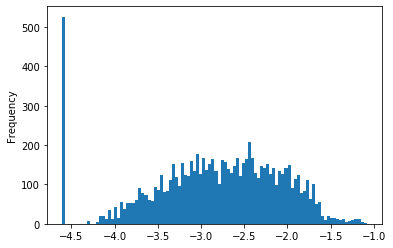

In [497]:
np.log(data["Item_Visibility"]+0.01).plot(kind="hist",bins=100)

Since this curve in more symmetric hence change the values of<br>
data["Item_Visibility"] to np.log(data["Item_Visibility"]+0.01)

In [498]:
data["Item_Visibility"]=np.log(data["Item_Visibility"]+0.01)

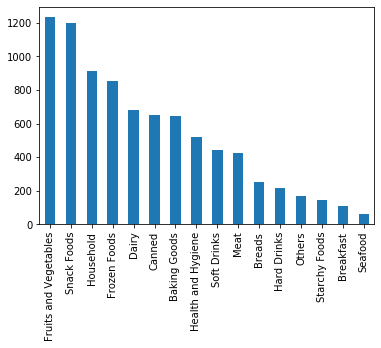

In [499]:
data["Item_Type"].value_counts().plot(kind="bar")

Most of the selling items are food and vegetable<br>
and least one are seafoods.

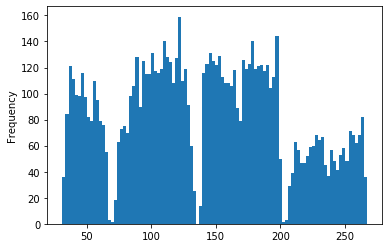

In [500]:
data["Item_MRP"].plot(kind="hist",bins=100)

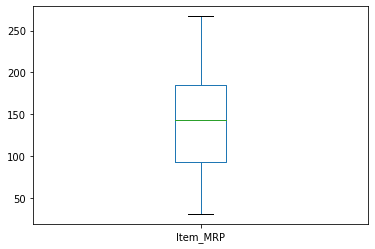

In [501]:
data["Item_MRP"].plot(kind="box")

There is no outlier in item selling price <br>
Most of the food has price range 100-180 

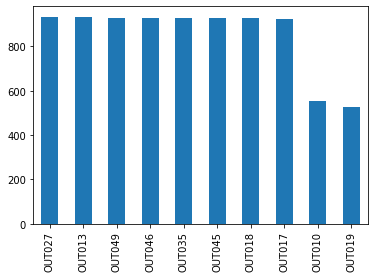

In [502]:
data["Outlet_Identifier"].value_counts().plot(kind="bar")

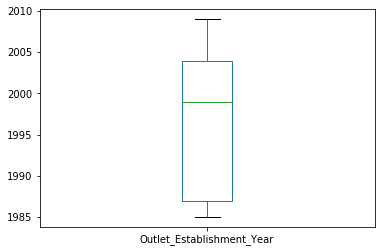

In [503]:
data["Outlet_Establishment_Year"].plot(kind="box")

Most of the item that are sold have establishment year<br>
in between 1987-2003

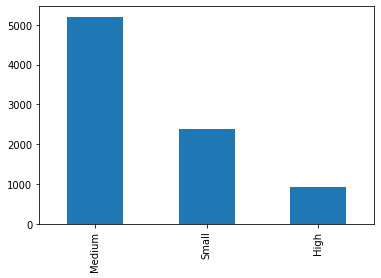

In [504]:
data["Outlet_Size"].value_counts().plot(kind="bar")

Most of the selling items has medium size

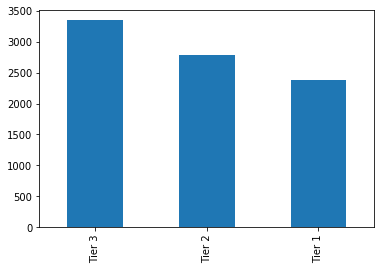

In [505]:
data["Outlet_Location_Type"].value_counts().plot(kind="bar")

Item of location type tier 3 are the most selling one 

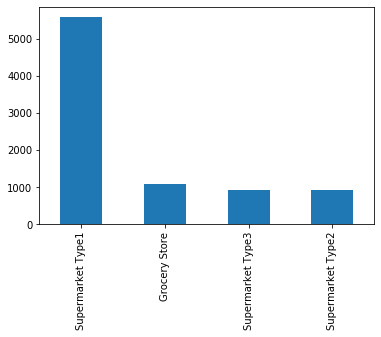

In [506]:
data["Outlet_Type"].value_counts().plot(kind="bar")

Item from Super market are sold in larger quantities

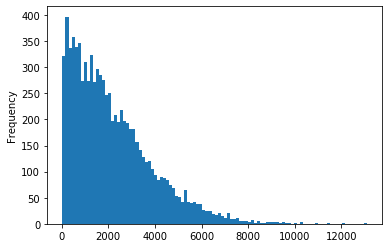

In [507]:
data["Item_Outlet_Sales"].plot(kind="hist",bins=100)

Highly  left skewed

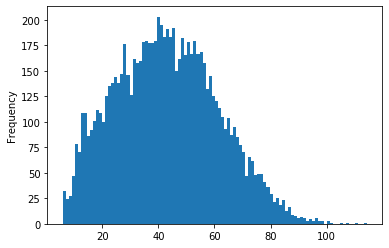

In [508]:
np.sqrt(data["Item_Outlet_Sales"]).plot(kind="hist",bins=100)

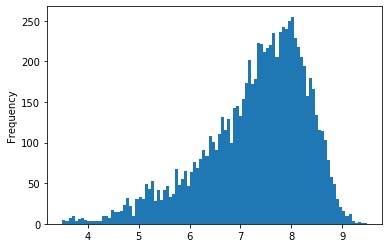

In [509]:
np.log(data["Item_Outlet_Sales"]).plot(kind="hist",bins=100)

Square root of item outlet sale is symmetrical and can be used in place.

In [510]:
data["Item_Outlet_Sales"]=np.sqrt(data["Item_Outlet_Sales"])

### Bivariate Analysis

Text(0.5, 1.0, 'Plot of Outlet_Establishment_Year Vs Item_Outlet_Sales')

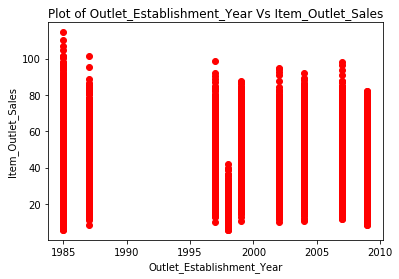

In [511]:
plt.scatter(data["Outlet_Establishment_Year"],data["Item_Outlet_Sales"],marker="o",color="r")
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Plot of Outlet_Establishment_Year Vs Item_Outlet_Sales")

Text(0.5, 1.0, 'Plot of Item_MRP Vs Item_Outlet_Sales')

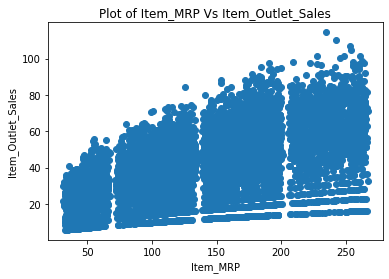

In [512]:
plt.scatter(data["Item_MRP"],data["Item_Outlet_Sales"],marker="o")
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Plot of Item_MRP Vs Item_Outlet_Sales")

Qiute linear relation in between mrp and sale item.

In [513]:
data["Item_Outlet_Sales"].corr(data["Item_MRP"])

0.5634343654675046

Text(0.5, 1.0, 'Plot of Item_MRP Vs Item_Outlet_Sales')

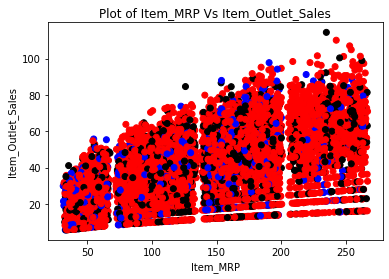

In [514]:
color={"FD":"red","NC":"black","DR":"blue"}
plt.scatter(data["Item_MRP"],data["Item_Outlet_Sales"],marker="o",color=data["Item_Identifier"].apply(lambda x:color[x]))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Plot of Item_MRP Vs Item_Outlet_Sales")

In [515]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [516]:
data["Item_Fat_Content"].replace({"Low Fat":"Low_fat"},inplace=True)
data["Item_Fat_Content"].value_counts()

Low_fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Text(0.5, 1.0, 'Plot of Item_MRP Vs Item_Outlet_Sales')

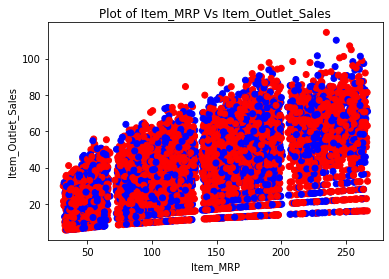

In [517]:
color={"Low_fat":"red","Regular":"blue"}
plt.scatter(data["Item_MRP"],data["Item_Outlet_Sales"],marker="o",color=data["Item_Fat_Content"].apply(lambda x:color1[x]))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Plot of Item_MRP Vs Item_Outlet_Sales")

Text(0.5, 1.0, 'Plot of Item_MRP Vs Item_Outlet_Sales')

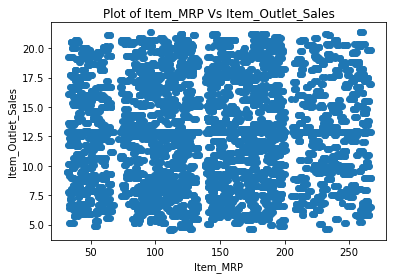

In [518]:
plt.scatter(data["Item_MRP"],data["Item_Weight"],marker="o")
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Plot of Item_MRP Vs Item_Outlet_Sales")

No conclusion can be drawn from this plot

In [519]:
data.groupby("Item_Identifier").Item_Outlet_Sales.mean()

Item_Identifier
DR    40.930996
FD    43.278500
NC    42.672705
Name: Item_Outlet_Sales, dtype: float64

In [520]:
data.groupby("Item_Fat_Content").Item_Outlet_Sales.mean()

Item_Fat_Content
Low_fat    42.709207
Regular    43.377126
Name: Item_Outlet_Sales, dtype: float64

In [521]:
data.groupby(["Item_Fat_Content","Item_Identifier"]).Item_Outlet_Sales.mean()

Item_Fat_Content  Item_Identifier
Low_fat           DR                 41.164783
                  FD                 43.079961
                  NC                 42.672705
Regular           DR                 38.533852
                  FD                 43.494288
Name: Item_Outlet_Sales, dtype: float64

In [522]:
data.groupby(["Item_Type","Outlet_Size"]).Item_Outlet_Sales.mean()

Item_Type              Outlet_Size
Baking Goods           High           42.735983
                       Medium         41.811871
                       Small          37.118049
Breads                 High           44.281863
                       Medium         43.901734
                       Small          42.211008
Breakfast              High           42.260126
                       Medium         43.210286
                       Small          36.510976
Canned                 High           44.011341
                       Medium         44.678516
                       Small          41.632137
Dairy                  High           46.198219
                       Medium         44.480061
                       Small          38.867961
Frozen Foods           High           44.181573
                       Medium         43.182812
                       Small          39.586373
Fruits and Vegetables  High           46.223386
                       Medium         45.262824
     

## Implementing Model

In [523]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low_fat,-3.647841,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,61.115775
1,DR,5.92,Regular,-3.530912,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,21.057607
2,FD,17.50,Low_fat,-3.620844,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,45.795961
3,FD,19.20,Regular,-4.605170,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,27.062520
4,NC,8.93,Low_fat,-4.605170,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,31.538947


In [531]:
#creating dummies variable
columns=data.columns
data=pd.get_dummies(data)
data=pd.DataFrame(data,columns=columns)
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Low_fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,-3.647841,249.8092,1999,61.115775,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,-3.530912,48.2692,2009,21.057607,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,-3.620844,141.6180,1999,45.795961,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,-4.605170,182.0950,1998,27.062520,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.93,-4.605170,53.8614,1987,31.538947,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0


In [532]:
data.shape

(8523, 46)

In [533]:
#identfying the target varibale
feature=data.drop("Item_Outlet_Sales",axis=1)
target=data["Item_Outlet_Sales"]

In [534]:
#dividing data into train set and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(feature,target,test_size=0.2,random_state=100)

In [535]:
#importing linear regression 
from sklearn.linear_model import LinearRegression as LR
lr=LR()
lr.fit(train_x,train_y)
lr_train_predict=lr.predict(train_x)
lr_train_score=lr.score(train_x,train_y)
print("Score of model in train set :",lr_train_score)

Score of model in train set : 0.6604389790838368


In [536]:
lr_test_predict=lr.predict(test_x)
lr_test_score=lr.score(test_x,test_y)
print("Score of model on test set :",lr_test_score)

Score of model on test set : 0.6410106001421592


In [537]:
#importing mean absolute error
from sklearn.metrics import mean_absolute_error as mae
train_mae=mae(lr_train_predict,train_y)
test_mae=mae(lr_test_predict,test_y)
print("Mean Absolute Error of train set :",train_mae)
print("Mean Absolute Error of test set :",test_mae)

Mean Absolute Error of train set : 8.367898108117704
Mean Absolute Error of test set : 8.569371209521748


Mean absolute error is very less.

Text(0, 0.5, 'coefficients')

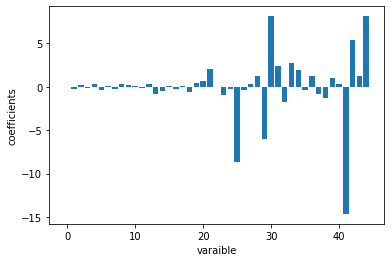

In [538]:
coefficients=lr.coef_
x=range(len(lr.coef_))
plt.bar(x,coefficients)
plt.xlabel("varaible")
plt.ylabel("coefficients")

Text(0, 0.5, 'residuals')

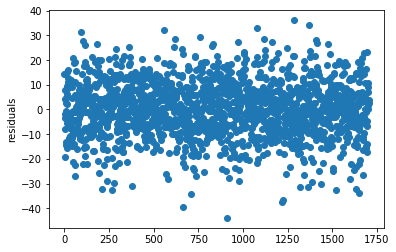

In [539]:
residuals=test_y-lr_test_predict
x=range(len(residuals))
plt.scatter(x,residuals)
plt.ylabel("residuals")

In [540]:
#importing knn
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(train_x,train_y)
knn_train_score=knn.score(train_x,train_y)
print("Score of train set :",knn_train_score)

Score of train set : 0.7134677670198035


In [541]:
knn_test_score=knn.score(test_x,test_y)
print("Score on test set :",knn_test_score)

Score on test set : 0.5167478273365298


In [542]:
#finding the best value of neighbors
error_test=[]
for i in range(1,30):
    knn=KNN(n_neighbors=i)
    knn.fit(train_x,train_y)
    score_test=knn.score(test_x,test_y)
    error_test.append(1-score_test)

Text(0, 0.5, 'Error')

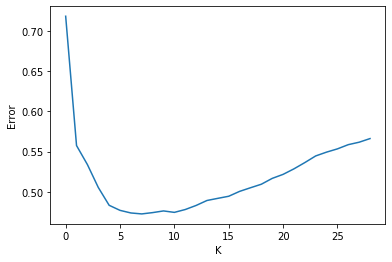

In [543]:
x=range(len(error_test))
plt.plot(x,error_test)
plt.xlabel("K")
plt.ylabel("Error")

Text(0, 0.5, 'Error')

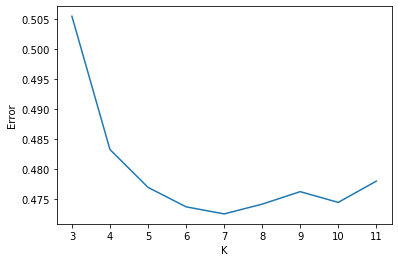

In [544]:
plt.plot(x[3:12],error_test[3:12])
plt.xlabel("K")
plt.ylabel("Error")

So suitable value of k is 7 as per test set

In [545]:
print("Score of test set for K(7) is :",1-error_test[7])

Score of test set for K(7) is : 0.5274647449119875


In [546]:
#importing decision tree
from sklearn.tree import DecisionTreeRegressor as DT
dt=DT()
dt.fit(train_x,train_y)
dt_train_score=dt.score(train_x,train_y)
print("Score of model on train set  is :",dt_train_score)

Score of model on train set  is : 1.0


In [547]:
dt_test_score=dt.score(test_x,test_y)
print("Score of model on test set is :",dt_test_score)

Score of model on test set is : 0.2913642128897618


In [548]:
#finding best cobination of decision tree max depth
score=[]
for i in range(1,30):
    dt=DT(max_depth=i)
    dt.fit(train_x,train_y)
    dt_test_score=dt.score(test_x,test_y)
    score.append(dt_test_score)

Text(0, 0.5, 'Score')

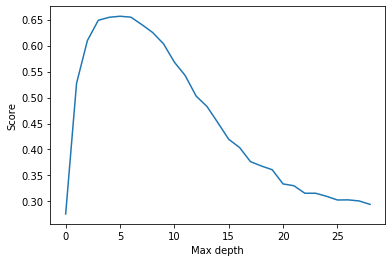

In [549]:
x=range(len(score))
plt.plot(x,score)
plt.xlabel("Max depth")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

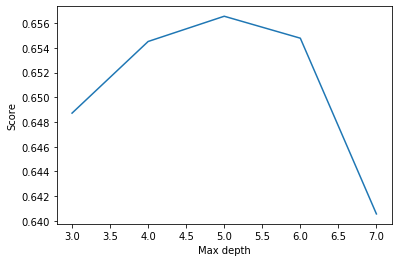

In [550]:
x=range(len(score))
plt.plot(x[3:8],score[3:8])
plt.xlabel("Max depth")
plt.ylabel("Score")

So suitalble value of max depth is 5  for the test set

In [551]:
print("Score of model on test set is :",score[5])

Score of model on test set is : 0.6565476583140204


In [552]:
#finding best combination for maximum leaf node
score=[]
for i in range(2,30): 
    dt=DT(max_leaf_nodes=i)
    dt.fit(train_x,train_y)
    score.append(dt.score(test_x,test_y))

Text(0, 0.5, 'Score')

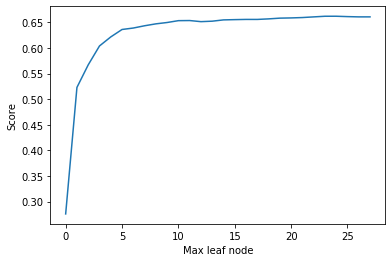

In [553]:
x=range(len(score))
plt.plot(x,score)
plt.xlabel("Max leaf node")
plt.ylabel("Score")

Suitable value of max leaf node is thus 10

In [554]:
print("Score of model on test set is :",score[10])

Score of model on test set is : 0.6531308973216685


In [555]:
#finding best combination for minimum sample at leaf node
score=[]
for i in range(1,50): 
    dt=DT(min_samples_leaf=i)
    dt.fit(train_x,train_y)
    score.append(dt.score(test_x,test_y))

Text(0, 0.5, 'Score')

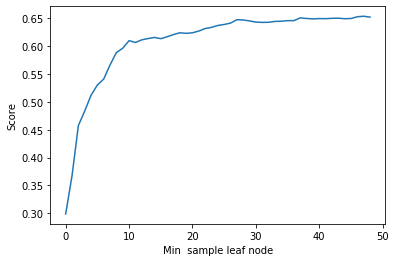

In [556]:
x=range(len(score))
plt.plot(x,score)
plt.xlabel("Min  sample leaf node")
plt.ylabel("Score")

Possible suitable value of minimum sample at leaf node is 28

In [557]:
print("Score of model on test set is :",score[28])

Score of model on test set is : 0.6470098908706318


#### Hence from above all,decision tree for max depth of 5 and linear regressor are the good model. at model score of 0.65 apx